### Importing the packages

In [1]:
# Common imports

import numpy as np
import pandas as pd


# To plot pretty figures

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning packages
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier

# Ignore useless warnings (see SciPy issue #5998)

import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

#### Importing the dataset and Exploring it

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
df.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
70371,53842.0,1.303925,0.089598,0.368938,-0.076045,-0.564251,-1.138721,0.014100,-0.267873,0.165184,...,-0.105082,-0.252061,0.040542,0.468376,0.261604,0.958747,-0.079695,0.004513,0.45,0
215935,140284.0,-0.116971,0.821763,-1.081630,-1.323237,1.585322,-0.741045,1.478243,-0.154749,-0.492182,...,0.273607,0.833186,-0.207488,0.243790,-0.297779,0.070769,0.373682,0.261364,20.00,0
90778,63163.0,0.669511,-1.832670,-0.857572,-0.617382,-0.562357,0.267138,0.091187,-0.142765,-0.829037,...,-0.208350,-1.021210,-0.454068,-1.276172,0.225229,1.114302,-0.131093,0.057564,417.50,0
237513,149273.0,-0.028584,0.816946,0.225170,-0.580649,0.405444,-0.989116,1.248105,-0.282264,-0.228139,...,-0.224027,-0.494309,0.159007,-0.006152,-0.423852,0.136863,0.238062,0.102630,49.99,0
76116,56401.0,-3.642261,-2.088786,-0.877411,-2.076901,-2.043673,-0.026067,1.576694,0.639107,0.676576,...,-0.178378,-0.797318,-0.168436,-0.281728,-0.375765,-0.508474,0.618823,-0.719038,684.76,0
7140,9362.0,-0.881074,0.934980,2.307692,1.797961,-0.345140,0.954981,-0.051457,0.100461,2.073544,...,-0.398532,-0.545204,-0.028122,0.018075,-0.461343,-0.527050,-0.312926,0.153317,23.89,0
102490,68227.0,-1.674224,1.004177,1.621643,0.930701,-1.401951,0.688169,-0.187805,1.046375,-0.647852,...,0.170111,0.323633,-0.045447,0.020286,0.317449,-0.267336,-0.169034,-0.158317,131.43,0
169202,119576.0,-0.164136,-0.123955,0.651508,-0.615477,0.624987,1.429410,-0.321729,0.623857,0.884429,...,0.407876,1.401386,0.112393,-1.427305,-1.119237,0.607735,0.007019,0.056456,18.99,0
33822,37403.0,1.111646,-0.531430,1.314816,0.860409,-1.138440,0.612286,-1.000199,0.371199,1.343889,...,0.048989,0.519346,-0.193921,0.096207,0.513264,0.695180,0.021126,0.008020,20.00,0
120785,75961.0,1.158020,-1.047580,1.388790,-0.559393,-1.981272,-0.275442,-1.329513,0.187483,-0.414190,...,-0.068804,0.118353,0.043924,0.575481,-0.137899,1.079356,-0.020119,0.028626,68.00,0


In [6]:
df.loc[:, ['Amount', 'Time']].describe()

,Amount,Time
count,284807.000000,284807.000000
mean,88.349619,94813.859575
std,250.120109,47488.145955
min,0.000000,0.000000
25%,5.600000,54201.500000
50%,22.000000,84692.000000
75%,77.165000,139320.500000
max,25691.160000,172792.000000


    it makes sense to rescale the columns Time, Amount

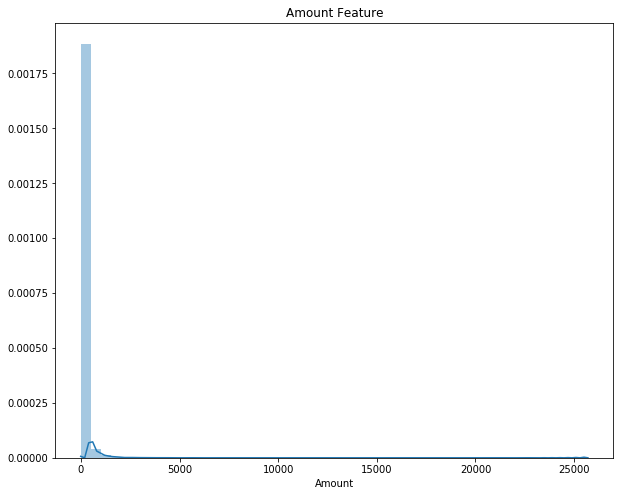

In [7]:
# Plotting the Amount Feature

plt.figure(figsize=(10,8))
plt.title('Amount Feature')
sns.distplot(df.Amount)

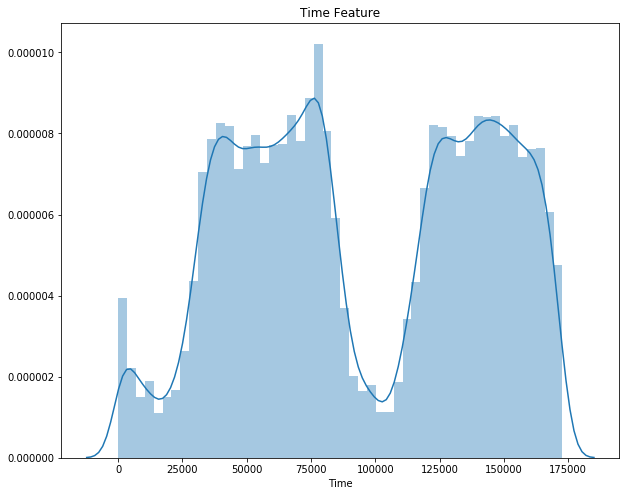

In [8]:
# Plotting the Time Feature

plt.figure(figsize=(10,8))
plt.title('Time Feature')
sns.distplot(df.Time)

In [9]:
# Checking for missing values

df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
distribution = df['Class'].value_counts()
distribution

0    284315
1       492
Name: Class, dtype: int64

In [11]:
fraud = distribution[0]
normal = distribution[1]

In [12]:
fraud

284315

In [13]:
normal

492

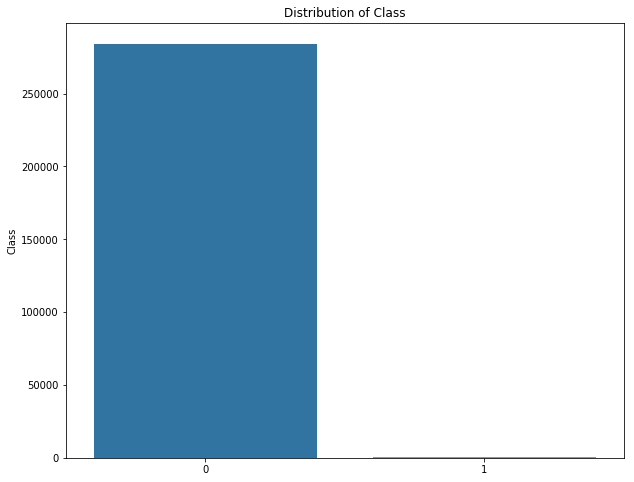

In [14]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Class')
sns.barplot(x=distribution.index, y=distribution)

In [15]:
# Correlation

correlation = df.corr()

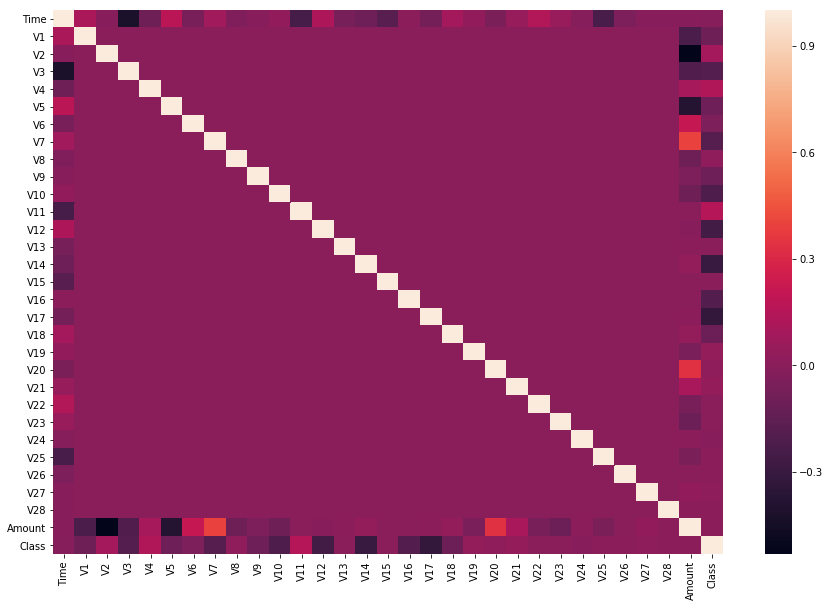

In [16]:
# Plotting the correlation using the heatmap

plt.figure(figsize=(15,10))
sns.heatmap(data = correlation)

### StandardScaler

In [17]:
scaler_amount = StandardScaler()
scaler_time = StandardScaler()

In [18]:
# Scaled Amount

scaled_amount = scaler_amount.fit_transform(df[['Amount']])
list_amount = [item for sublist in scaled_amount.tolist() for item in sublist]
scaled_amount = pd.Series(list_amount)

In [19]:
# Scaled Time

scaled_time = scaler_time.fit_transform(df[['Time']])
list_time = [item for sublist in scaled_time.tolist() for item in sublist]
scaled_time = pd.Series(list_time)

In [20]:
type(scaled_time)

pandas.core.series.Series

In [21]:
type(scaled_amount)

pandas.core.series.Series

In [22]:
type(df)

pandas.core.frame.DataFrame

In [23]:
# Adding new values to the existing dataframe and dropping the original columns

df_scaled = pd.concat([df, scaled_time.rename('Scaled_Time'), scaled_amount.rename('Scaled_Amount')], axis = 1)

In [24]:
df_scaled

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Scaled_Time,Scaled_Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,-1.996583,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-1.996583,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,-1.996562,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,-1.996562,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,-1.996541,-0.073403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,1.641931,-0.350151
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,1.641952,-0.254117
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,1.641974,-0.081839
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,1.641974,-0.313249


In [25]:
df_scaled.drop(['Time', 'Amount'], axis = 1, inplace = True)

In [26]:
df_scaled

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Scaled_Time,Scaled_Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,-1.996583,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-1.996583,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,-1.996562,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,-1.996562,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-1.996541,-0.073403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0,1.641931,-0.350151
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0,1.641952,-0.254117
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0,1.641974,-0.081839
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0,1.641974,-0.313249


### Splitting the data into train and test

In [27]:
# Splitting into train and test

split = np.random.rand(len(df)) < 0.9
train = df[split]
test = df[~split]

In [28]:
train.reset_index(drop = True, inplace = True)
test.reset_index(drop = True, inplace = True)

In [29]:
print('Train is',train.shape)
print('Test is',test.shape)

Train is (256314, 31)
Test is (28493, 31)


#### Creating the subsample with balanced class distribution

In [30]:
#how many random samples from normal transactions do we need?
no_of_frauds = train.Class.value_counts()[1]

In [31]:
non_fraud = train[train['Class'] == 0]
fraud = train[train['Class'] == 1]

In [32]:
selected = non_fraud.sample(no_of_frauds)
selected.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
12974,25589.0,0.034094,0.617092,-0.768274,0.515825,2.023734,4.372667,-1.395316,-1.733873,-0.558627,...,-1.400029,-0.052144,-0.164080,1.012857,1.025245,-0.163631,0.120316,0.250219,47.00,0
121450,80942.0,1.069132,-0.215075,-0.304678,-0.181272,-0.148000,-0.854476,0.463620,-0.241456,-0.357603,...,-0.278371,-1.122425,-0.010884,0.056511,0.186215,0.725182,-0.134115,0.006613,124.80,0
163938,125209.0,1.986918,0.469247,-3.567338,0.283588,2.201479,0.502293,0.457621,0.138196,-0.163908,...,0.015130,0.312723,-0.052714,-1.120330,0.240724,0.796839,-0.037973,-0.041132,0.76,0
30759,37543.0,-0.723876,-0.900132,1.343025,-1.186059,-0.759756,0.758849,-0.043811,-0.267731,0.464890,...,-0.116025,0.995111,0.335274,-0.285598,-0.957549,-0.453486,-0.479708,-0.070861,75.85,0
220461,152551.0,-0.371619,1.588515,-1.464998,-0.442974,1.127644,-1.495596,1.303575,0.032513,-0.771362,...,0.210240,0.753995,-0.098198,1.070138,-0.466462,0.501538,0.274422,0.247767,5.00,0


In [33]:
#concatenating both into a subsample data set with equal class distribution
selected.reset_index(drop=True, inplace=True)
fraud.reset_index(drop=True, inplace=True)

In [34]:
subsample = pd.concat([selected, fraud])
len(subsample)

876

In [35]:
subsample = subsample.sample(frac=1).reset_index(drop=True)
subsample.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,42633.0,1.128444,-0.057850,-0.228329,0.789307,-0.002741,0.351107,-0.380294,0.335945,0.660709,...,-0.158062,-0.343791,-0.154983,-0.768208,0.465512,0.470394,-0.002675,0.021462,29.56,0
1,115548.0,0.076923,1.550536,0.130242,3.252449,0.474398,-0.248617,0.534259,0.403192,-1.617524,...,-0.150187,-0.607031,0.281447,-0.119827,-0.822228,-0.385230,-0.100849,-0.061552,0.79,0
2,136690.0,2.042664,-0.204458,-1.204846,0.237812,-0.049989,-0.738690,-0.018046,-0.090364,0.508637,...,-0.274678,-0.755763,0.305297,-0.373065,-0.331271,0.202921,-0.083640,-0.076418,0.89,0
3,39027.0,-0.479760,0.982737,1.662109,-0.095580,-0.135785,-0.680791,0.625551,0.068070,-0.664577,...,-0.159833,-0.448768,0.005709,0.514348,-0.250507,0.041067,0.259335,0.113218,8.99,0
4,125612.0,1.889618,1.073099,-1.678018,4.173268,1.015516,-0.009389,-0.079706,0.064071,-0.714517,...,0.203728,0.733796,-0.036560,0.334306,0.147171,0.279556,0.031669,0.035883,3.22,1
5,28658.0,-28.524268,15.876923,-29.468732,6.447591,-20.786000,-4.865613,-19.501084,18.748872,-3.642990,...,1.805770,-2.119376,-1.317450,0.169846,2.051687,-0.210502,1.301734,0.380246,99.99,1
6,151951.0,-1.159214,-0.186982,1.337962,-1.783949,-0.705107,-0.083967,-0.353425,0.735589,0.606626,...,0.242395,0.332024,0.054466,-0.377444,-0.428150,0.540217,-0.054149,0.007278,88.61,0
7,67290.0,-7.975771,-9.024854,1.583599,0.540932,3.186429,-2.424017,-0.964533,-1.020623,0.957341,...,-0.736901,1.363886,1.864970,0.184492,1.311222,-0.141081,-2.309656,4.052522,119.80,0
8,42474.0,-3.843009,3.375110,-5.492893,6.136378,2.797195,-2.646162,-1.668931,-2.617552,-3.945843,...,-1.277812,0.719652,0.451125,-0.258094,0.656129,0.556676,0.739383,-0.203050,1.00,1
9,37978.0,-0.737092,0.374635,3.744897,3.095949,-0.703279,2.668674,-0.886131,0.883516,0.430649,...,0.126193,1.101133,-0.316035,-0.242315,-0.012918,0.569819,0.277350,-0.076697,15.37,0


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

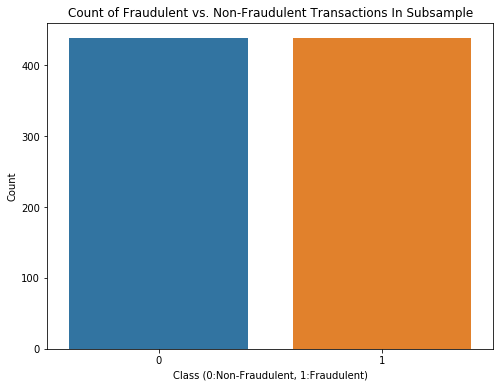

In [36]:
new_counts = subsample.Class.value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=new_counts.index, y=new_counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions In Subsample')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [37]:
new_correlation = subsample.corr()
new_correlation = new_correlation[['Class']]
new_correlation

,Class
Time,-0.139736
V1,-0.433540
V2,0.496066
V3,-0.573309
V4,0.709431
V5,-0.394367
V6,-0.382445
V7,-0.468966
V8,0.048411
V9,-0.560650


### Removing the outliers

In [38]:
Q1 = subsample.quantile(0.25)
Q3 = subsample.quantile(0.75)
IQR = Q3 - Q1

df2 = subsample[~((subsample < (Q1 - 2.5 * IQR))|(subsample > (Q3 + 2.5 * IQR))).any(axis=1)]

In [39]:
df2.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,42633.0,1.128444,-0.057850,-0.228329,0.789307,-0.002741,0.351107,-0.380294,0.335945,0.660709,...,-0.158062,-0.343791,-0.154983,-0.768208,0.465512,0.470394,-0.002675,0.021462,29.56,0
1,115548.0,0.076923,1.550536,0.130242,3.252449,0.474398,-0.248617,0.534259,0.403192,-1.617524,...,-0.150187,-0.607031,0.281447,-0.119827,-0.822228,-0.385230,-0.100849,-0.061552,0.79,0
2,136690.0,2.042664,-0.204458,-1.204846,0.237812,-0.049989,-0.738690,-0.018046,-0.090364,0.508637,...,-0.274678,-0.755763,0.305297,-0.373065,-0.331271,0.202921,-0.083640,-0.076418,0.89,0
3,39027.0,-0.479760,0.982737,1.662109,-0.095580,-0.135785,-0.680791,0.625551,0.068070,-0.664577,...,-0.159833,-0.448768,0.005709,0.514348,-0.250507,0.041067,0.259335,0.113218,8.99,0
4,125612.0,1.889618,1.073099,-1.678018,4.173268,1.015516,-0.009389,-0.079706,0.064071,-0.714517,...,0.203728,0.733796,-0.036560,0.334306,0.147171,0.279556,0.031669,0.035883,3.22,1


### Train and Test Split pt.2

In [40]:
X = df2.drop(['Class'], axis = 1)
y = df2['Class']

In [41]:
X.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

### Separate Classifiers vs Voting Classifier

In [43]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [44]:
from sklearn.naive_bayes import GaussianNB

In [48]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()
gnb_clf = GaussianNB()

voting_clf = VotingClassifier(
estimators = [('lr', log_clf), ('rf', rnd_clf), ('gnb', gnb_clf)],
voting = 'hard')
voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, gnb_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.959677419355
RandomForestClassifier 0.959677419355
GaussianNB 0.943548387097
VotingClassifier 0.959677419355
